In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [63]:
# disable warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

**1. Load Data**

In [64]:
# Load the data
df = pd.read_csv('../dataset/lending_club_loan_two.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.00,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.00,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.00,0.00,36369.00,41.80,25.00,w,INDIVIDUAL,0.00,0.00,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.00,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.00,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.00,0.00,20131.00,53.30,27.00,f,INDIVIDUAL,3.00,0.00,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.00,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.00,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.00,0.00,11987.00,92.20,26.00,f,INDIVIDUAL,0.00,0.00,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.00,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.00,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.00,0.00,5472.00,21.50,13.00,f,INDIVIDUAL,0.00,0.00,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.00,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.00,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.00,0.00,24584.00,69.80,43.00,f,INDIVIDUAL,1.00,0.00,"679 Luna Roads\nGreggshire, VA 11650"


**2. Exploratory Data Analysis 🔍**

> **OVERALL GOAL:** 
> - Get an understanding for which variables are important, view summary statistics, and visualize the data

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [66]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,395754.00,396030.00,358235.00,395495.00
mean,14113.89,13.64,431.85,74203.18,17.38,11.31,0.18,15844.54,53.79,25.41,1.81,0.12
std,8357.44,4.47,250.73,61637.62,18.02,5.14,0.53,20591.84,24.45,11.89,2.15,0.36
min,500.00,5.32,16.08,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00
25%,8000.00,10.49,250.33,45000.00,11.28,8.00,0.00,6025.00,35.80,17.00,0.00,0.00
50%,12000.00,13.33,375.43,64000.00,16.91,10.00,0.00,11181.00,54.80,24.00,1.00,0.00
75%,20000.00,16.49,567.30,90000.00,22.98,14.00,0.00,19620.00,72.90,32.00,3.00,0.00
max,40000.00,30.99,1533.81,8706582.00,9999.00,90.00,86.00,1743266.00,892.30,151.00,34.00,8.00


> **`Loan status`: Current status of the loan**

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

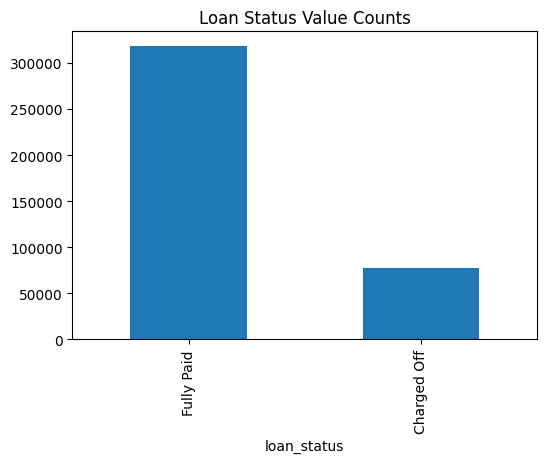

In [67]:
# Plot value counts with labels of counts
plt.figure(figsize=(6, 4))
df['loan_status'].value_counts().plot(kind='bar', title='Loan Status Value Counts')
df['loan_status'].value_counts()


- From the value counts of each status, we can see that this dataset is **imbalance**
- This shows that the majority of loans at Lending Club are fully paid, but there is still a small portion of loans that have been Charged off.

> **✔️ `loan_amnt` & `installment`**

- `installment`: The monthly payment owed by the borrower if the loan originates.
- `loan_amnt`: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

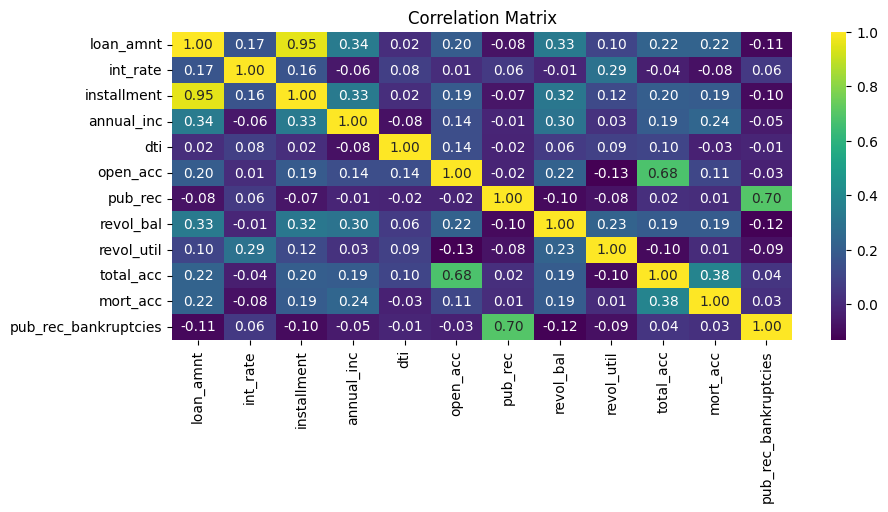

In [68]:
# Correlation matrix with numbers
plt.figure(figsize=(10, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


- The correlation between `loan_amnt` and `installment` very high, it might indicate that this is the strong relationship (high/low loan amount -> high/low installment)
- We need to check that, is this relationship make a duplicate information in the data

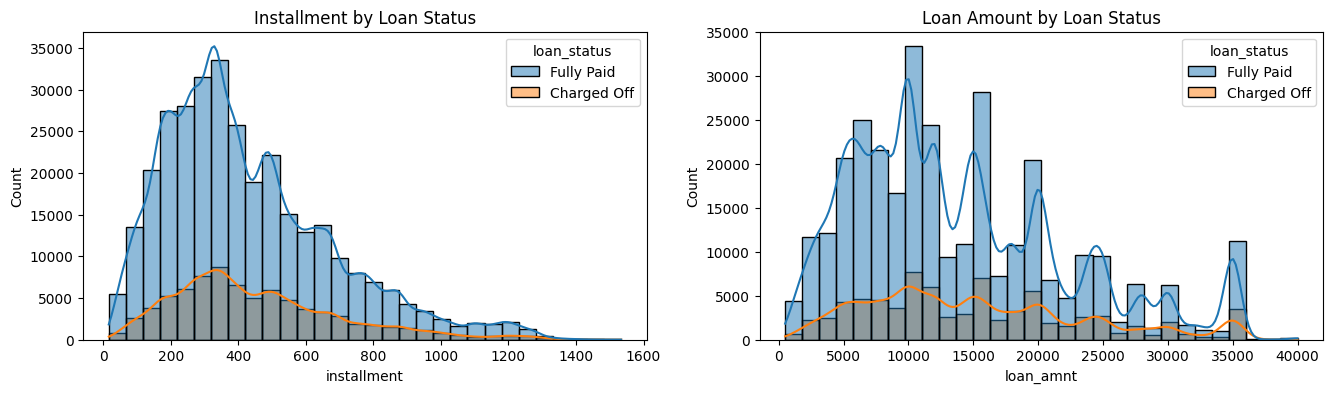

In [69]:
# Installment and loan amount by status histogram
# Installment by loan status
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='installment', hue='loan_status', bins=30, kde=True)
plt.title('Installment by Loan Status')
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='loan_amnt', hue='loan_status', bins=30, kde=True)
plt.title('Loan Amount by Loan Status')
plt.show()


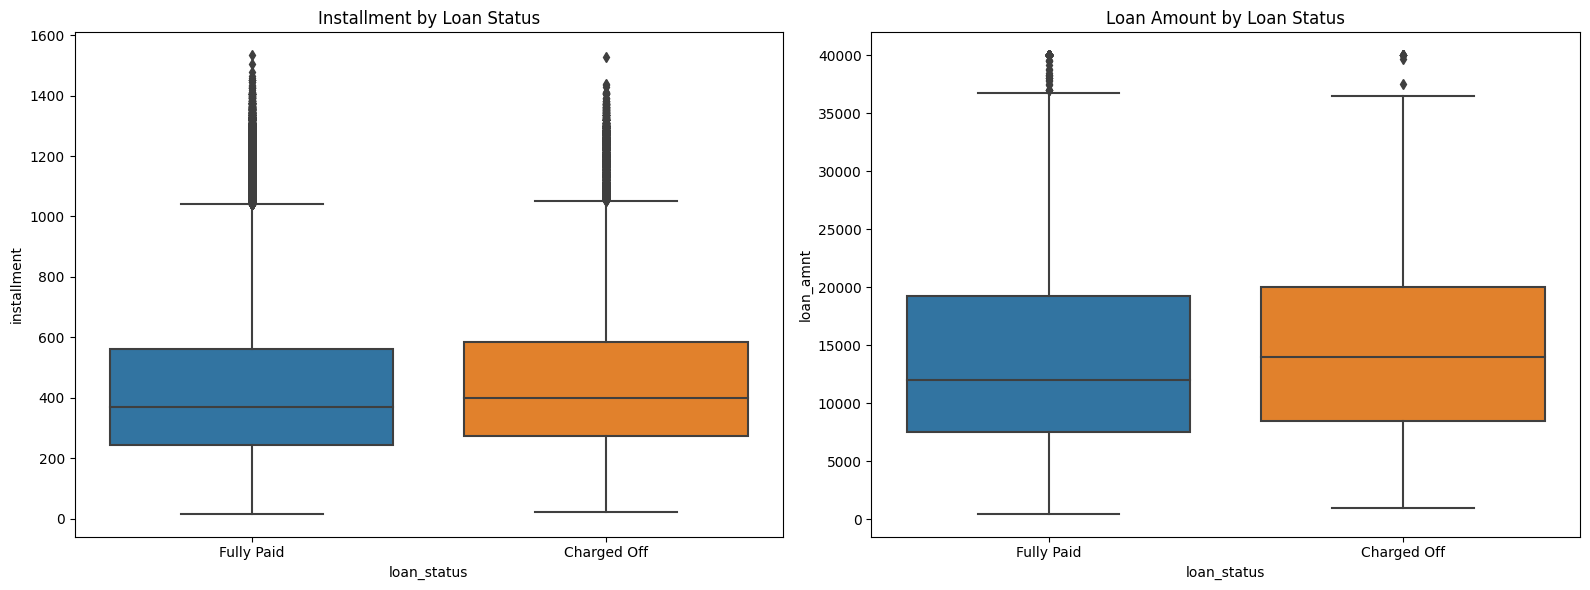

In [70]:
# Boxplot of loan amount by loan status # Installment by loan status
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='loan_status', y='installment')
plt.title('Installment by Loan Status')
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='loan_status', y='loan_amnt')
plt.title('Loan Amount by Loan Status')
plt.tight_layout()
plt.show()



In [71]:
df.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.00,15126.30,8505.09,1000.00,8525.00,14000.00,20000.00,40000.00
Fully Paid,318357.00,13866.88,8302.32,500.00,7500.00,12000.00,19225.00,40000.00


- From box-plot, histogram and descriptive statistics, it is clear that there is significant difference in loan amount and installment between fully paid and charged off loans.
- We can use these features to predict loan status.

> **✔️ `grade` & `sub_grade`**

- grade: LC assigned loan grade
- sub_grade: LC assigned loan subgrade

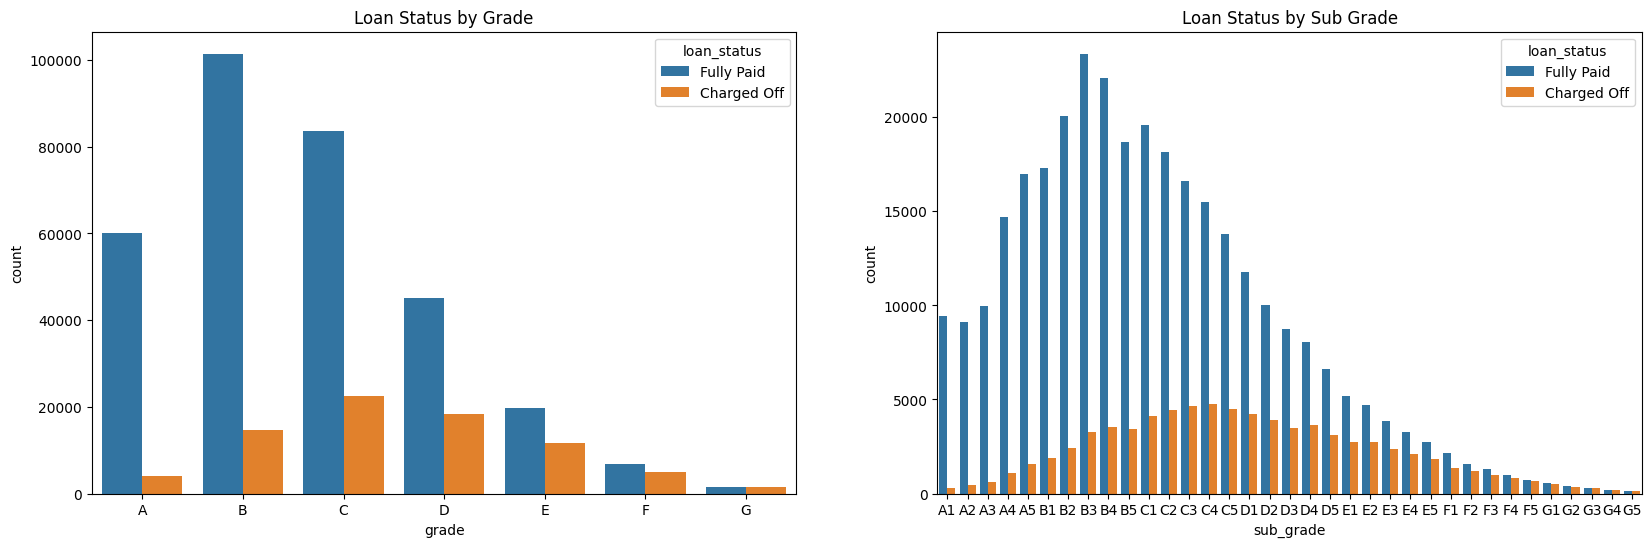

In [72]:
# Loan status by grade and subgrade in 2 plot in 1 frame
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='grade', hue='loan_status', order=sorted(df['grade'].unique()))
plt.title('Loan Status by Grade')
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='sub_grade', hue='loan_status', order=sorted(df['sub_grade'].unique()))
plt.title('Loan Status by Sub Grade')
plt.show()
 

> **✔️ `term`, `home_ownership`, `verification_status` & `purpose`**

- `term`: The number of payments on the loan. Values are in months and can be either 36 or 60.
- `home_ownership`: The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
- `verification_status`: Indicates if income was verified by LC, not verified, or if the income source was verified
- `purpose`: A category provided by the borrower for the loan request.

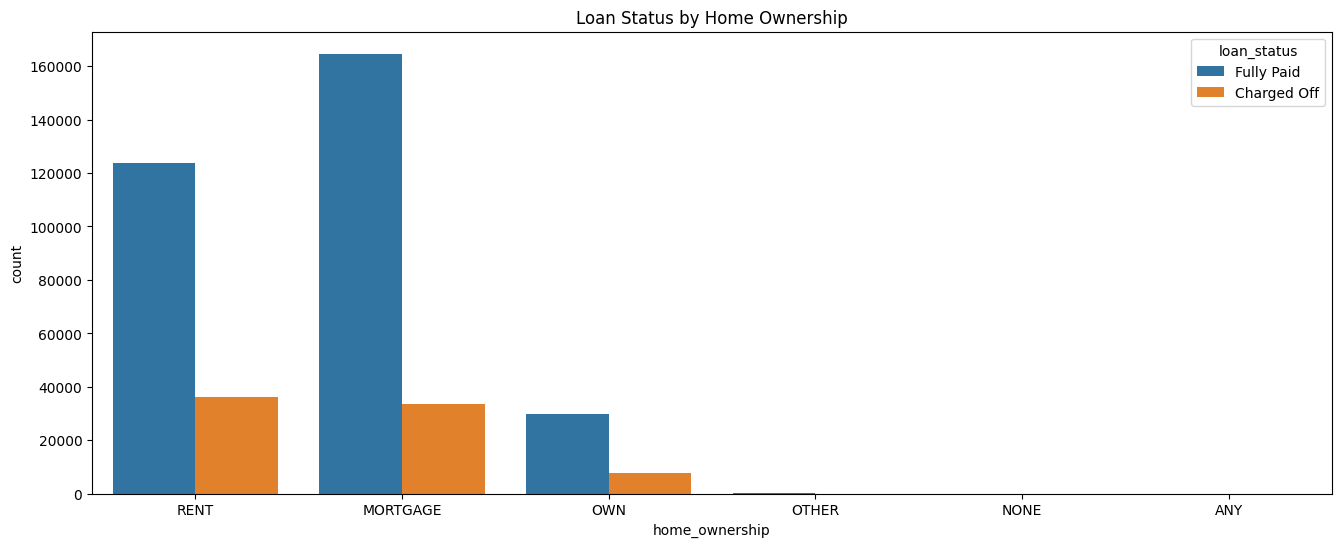

In [73]:
# Stack bar chart of loan status by home ownership
plt.figure(figsize=(16, 6))
sns.countplot(data=df, x='home_ownership', hue='loan_status')
plt.title('Loan Status by Home Ownership')
plt.show()


In [74]:
df.loc[(df.home_ownership == 'ANY') | (df.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'  
print(df['home_ownership'].value_counts())
print(df.loc[df['home_ownership']=='OTHER', 'loan_status'].value_counts())

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: count, dtype: int64
loan_status
Fully Paid     123
Charged Off     23
Name: count, dtype: int64


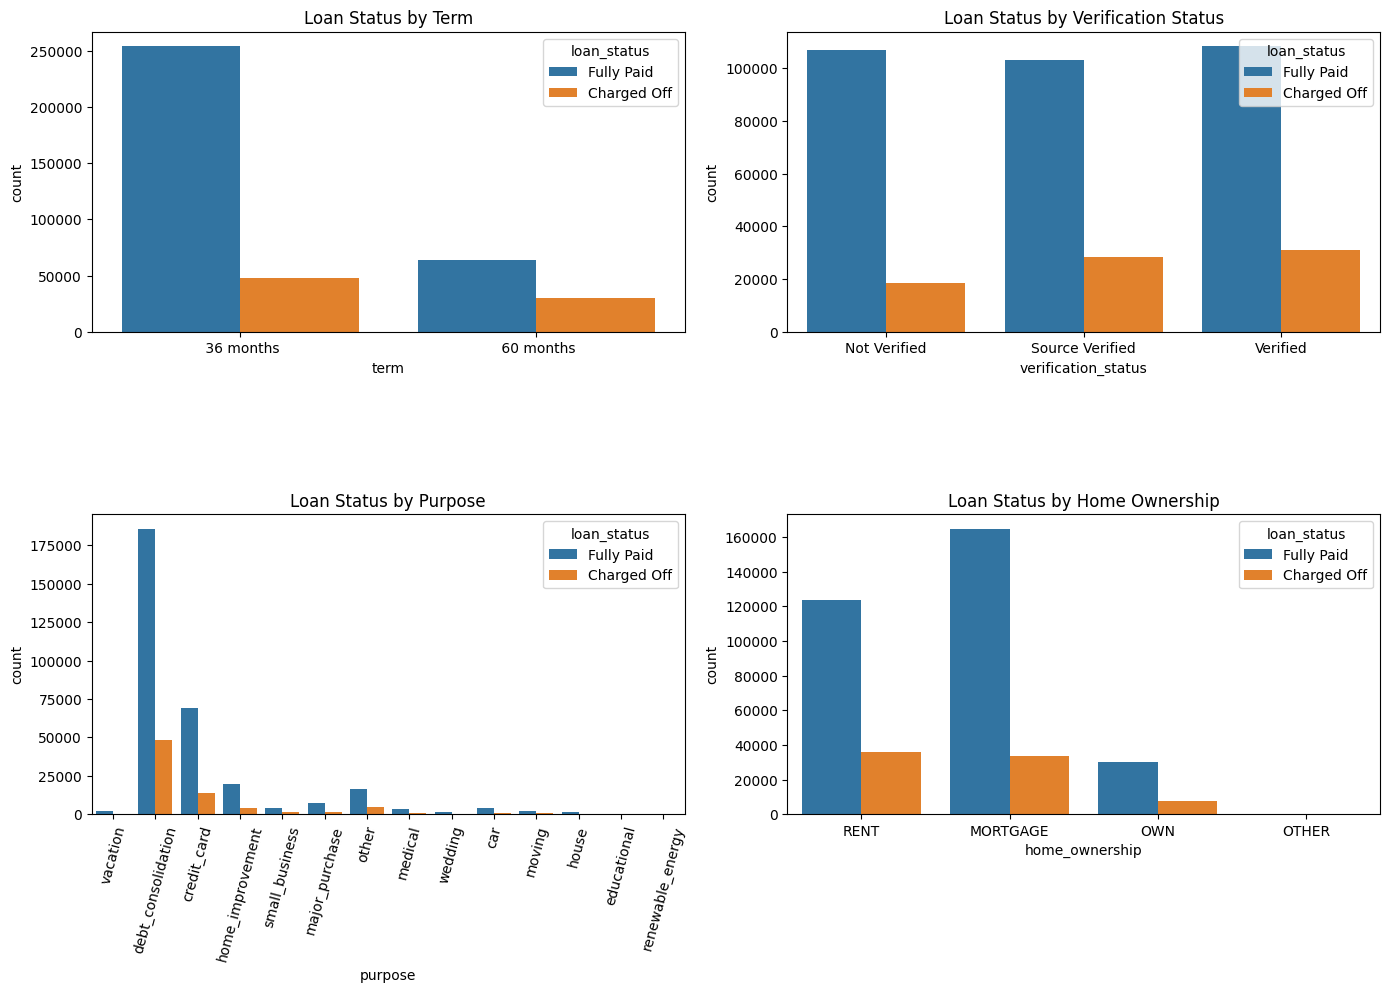

In [75]:
plt.figure(figsize=(14, 18))
plt.subplot(4, 2, 1)
sns.countplot(data=df, x='term', hue='loan_status')
plt.title('Loan Status by Term')
plt.subplot(4, 2, 2)
sns.countplot(data=df, x='verification_status', hue='loan_status')
plt.title('Loan Status by Verification Status')
plt.subplot(4, 2, 3)
g = sns.countplot(data=df, x='purpose', hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=75)
plt.title('Loan Status by Purpose')
plt.subplot(4, 2, 4)
sns.countplot(data=df, x='home_ownership', hue='loan_status')
plt.title('Loan Status by Home Ownership')
# set space between plots
plt.tight_layout()
plt.show()

> **✔️ `int_rate`, `annual_inc`, `emp_title`, `emp_length`**

- `int_rate`: Interest Rate on the loan
- `annual_inc`: The self-reported annual income provided by the borrower during registration

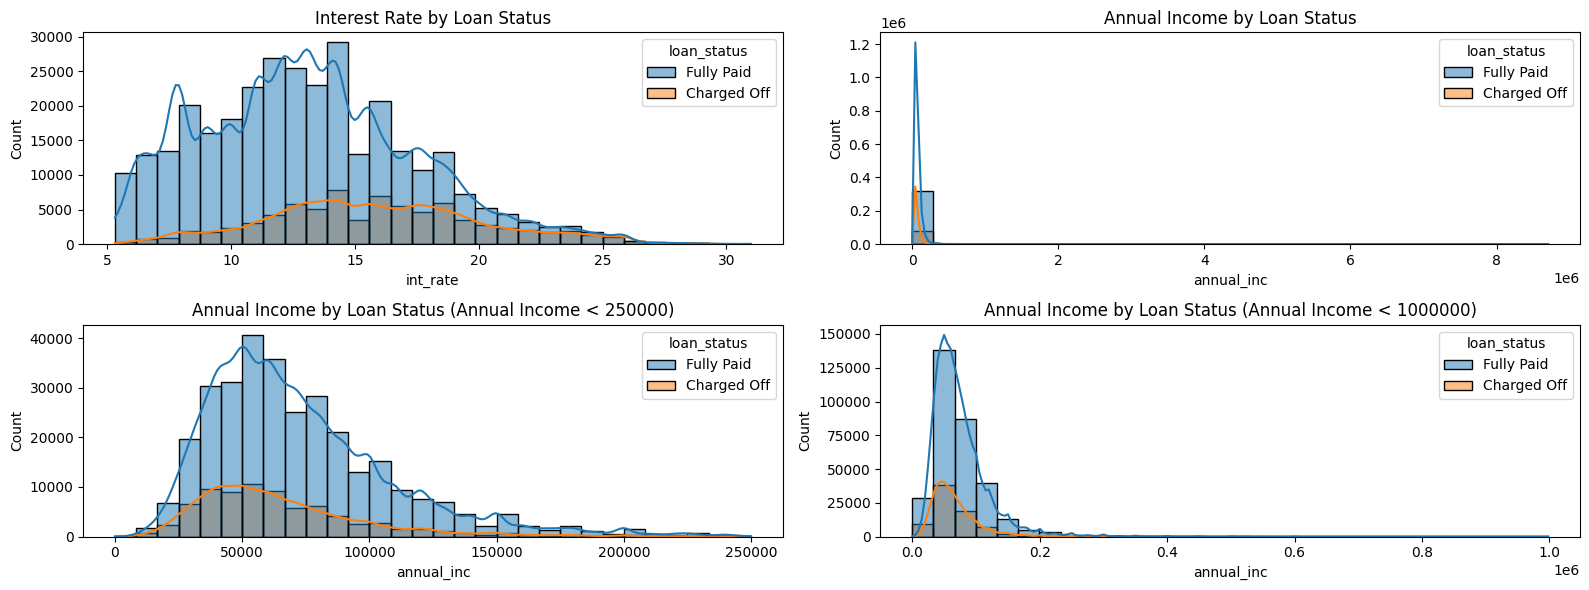

In [76]:
# Plots with loan status by annual income and interest rate
plt.figure(figsize=(16, 6))
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='int_rate', hue='loan_status', bins=30, kde=True)
plt.title('Interest Rate by Loan Status')
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='annual_inc', hue='loan_status', bins=30, kde=True)
plt.title('Annual Income by Loan Status')
# Annual income by loan status (Annual income < 250000)
plt.subplot(2, 2, 3)
sns.histplot(data=df.loc[df['annual_inc'] < 250000], x='annual_inc', hue='loan_status', bins=30, kde=True)
plt.title('Annual Income by Loan Status (Annual Income < 250000)')
plt.subplot(2, 2, 4)
sns.histplot(data=df.loc[df['annual_inc'] < 1000000], x='annual_inc', hue='loan_status', bins=30, kde=True)
plt.title('Annual Income by Loan Status (Annual Income < 1000000)')
plt.tight_layout()
plt.show()


- It seems that loans with high intersest rate are more likely to be unpaid.
- Only 75 (less then) borrowers have an annual income more than 1 million, and 4077

In [77]:
print(df.emp_title.isna().sum())
print(df.emp_title.nunique())

22927
173105


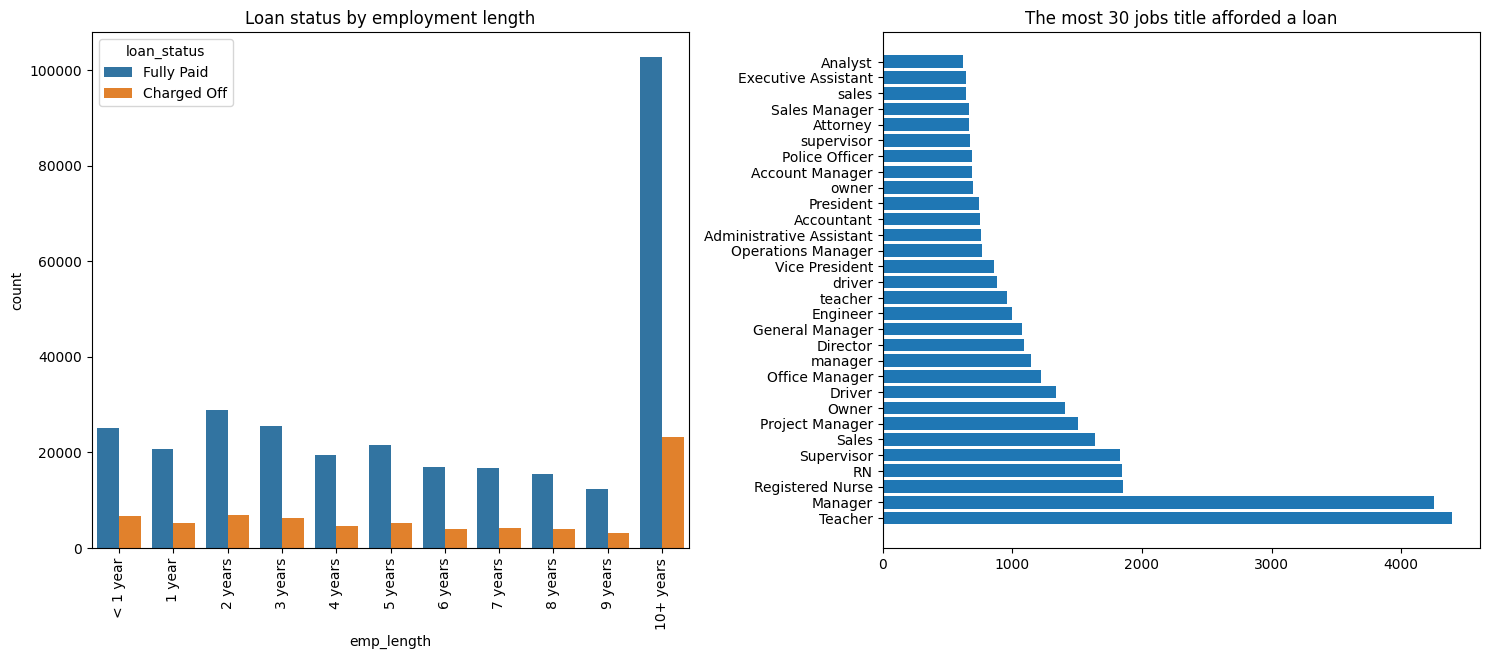

In [78]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
plt.title("Loan status by employment length")
g = sns.countplot(x='emp_length', data=df, hue='loan_status', order=order)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

plt.subplot(2, 2, 2)
plt.barh(df.emp_title.value_counts()[:30].index, df.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a loan")
plt.tight_layout()

> **✔️ `issue_d`, `earliest_cr_line`**

- `issue_d`: The month which the loan was funded
- `earliest_cr_line`: The month the borrower's earliest reported credit line was opened

C:\Users\takat\AppData\Local\Temp\ipykernel_688\695774384.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['issue_d'] = pd.to_datetime(df['issue_d'])
C:\Users\takat\AppData\Local\Temp\ipykernel_688\695774384.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])


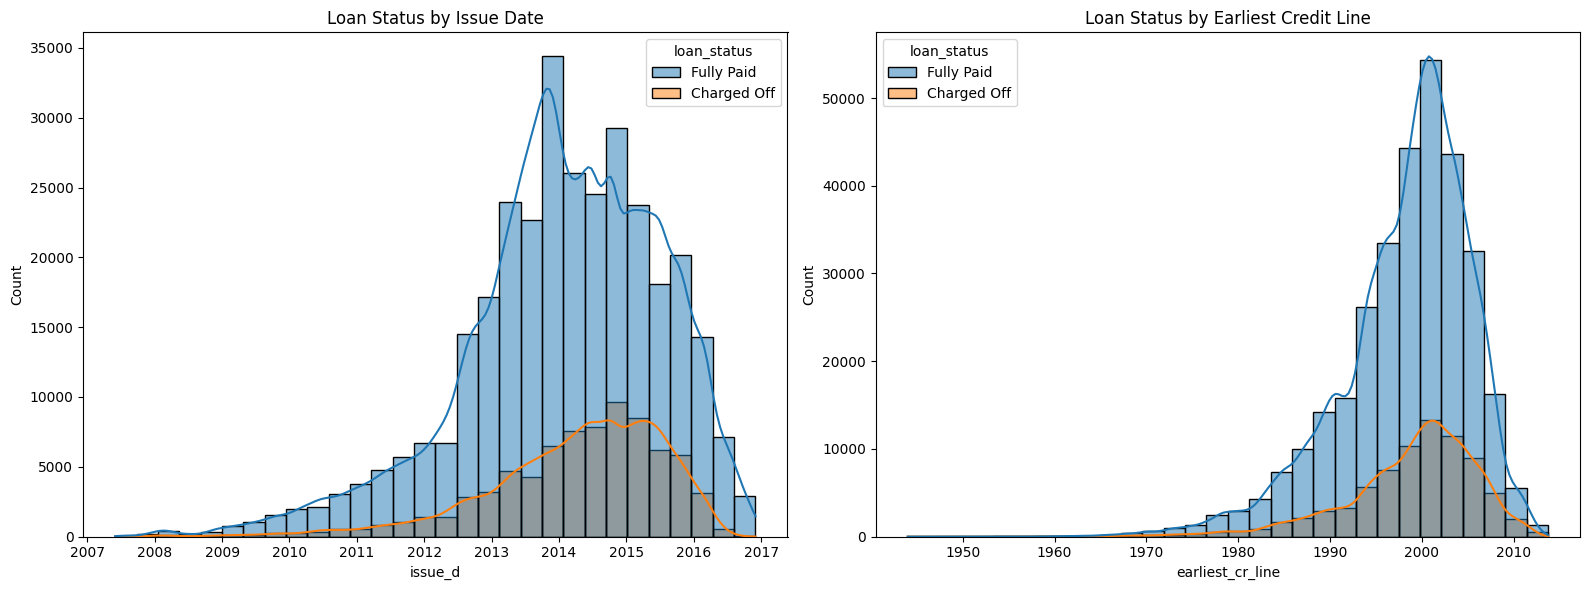

In [79]:
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

# Plot loan status by issue date and earliest credit line
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='issue_d', hue='loan_status', bins=30, kde=True)
plt.title('Loan Status by Issue Date')
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='earliest_cr_line', hue='loan_status', bins=30, kde=True)
plt.title('Loan Status by Earliest Credit Line')
plt.tight_layout()
plt.show()

> **✔️ `title` & `purpose`**

- `title`: The loan title provided by the borrower
- `purpose`: The loan purpose assigned by LC

In [80]:
df.title.isna().sum()

1756

In [81]:
print(df['title'].value_counts())
print("-"*50)
print(df['purpose'].value_counts())

title
Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: count, Length: 48816, dtype: int64
--------------------------------------------------
purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: count, dtype: int64


- title will be removed because we have the purpose column with is generated from it.

In [82]:
df.drop('title', axis=1, inplace=True)

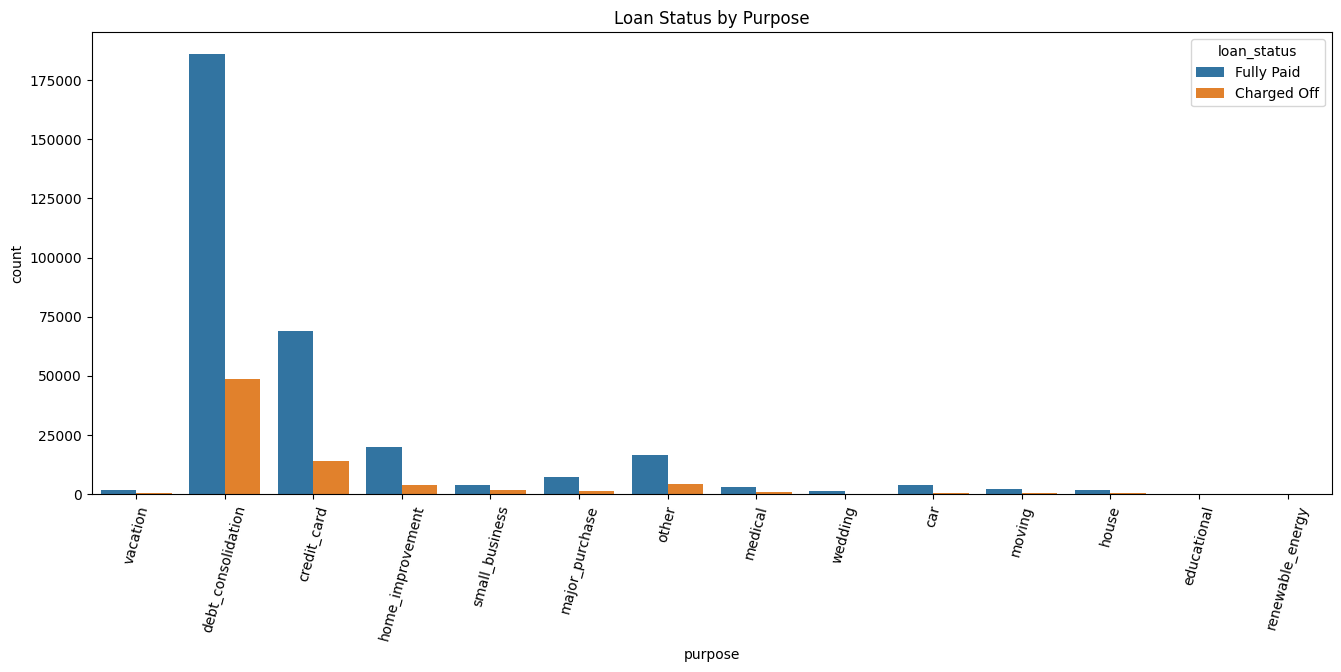

In [83]:

# plot loan status by purpose
plt.figure(figsize=(16, 6))
g = sns.countplot(data=df, x='purpose', hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=75)
plt.title('Loan Status by Purpose')
plt.show()

> **✔️ `dti`, `open_acc`, `revol_bal`, `revol_util`, & `total_acc`**

- dti: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
- open_acc: The number of open credit lines in the borrower's credit file.
- revol_bal: Total credit revolving balance
- revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- total_acc: The total number of credit lines currently in the borrower's credit file

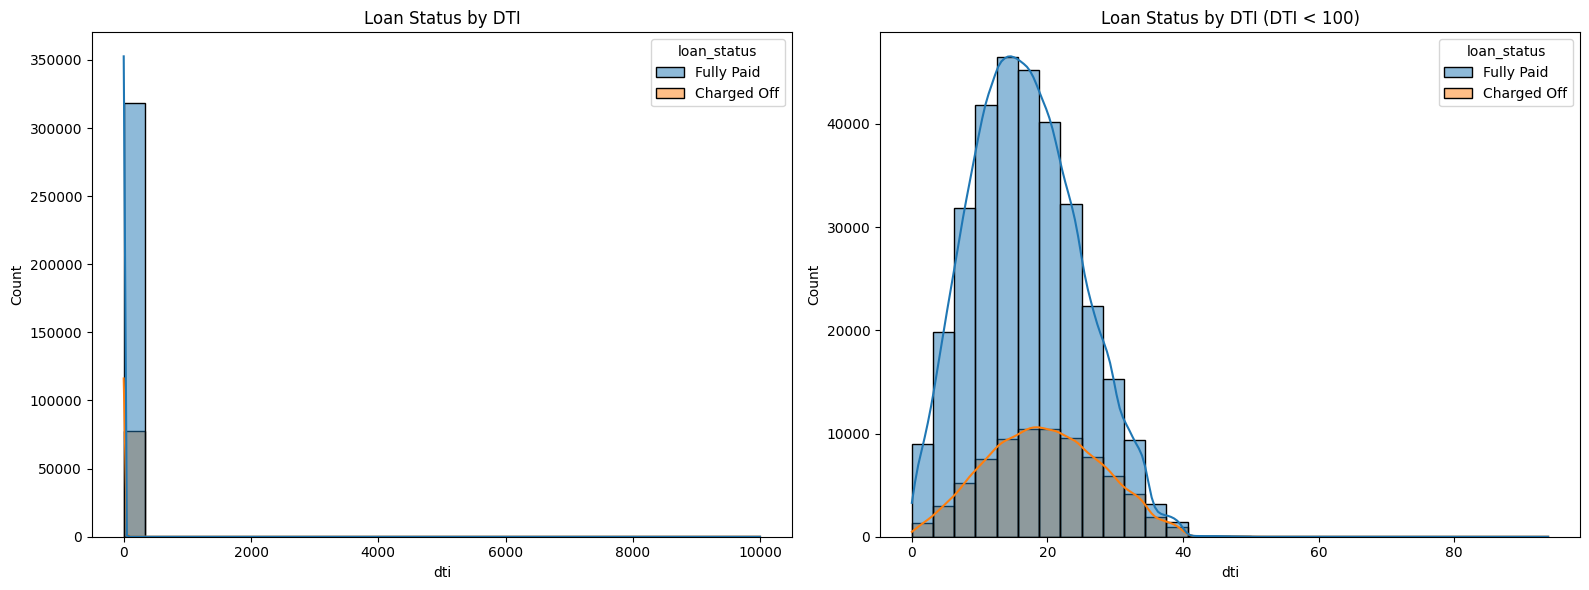

In [84]:
# Plot loan status by dti
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='dti', hue='loan_status', bins=30, kde=True)
plt.title('Loan Status by DTI')
plt.subplot(1, 2, 2)
sns.histplot(data=df.loc[df['dti'] < 100], x='dti', hue='loan_status', bins=30, kde=True)
plt.title('Loan Status by DTI (DTI < 100)')
plt.tight_layout()
plt.show()

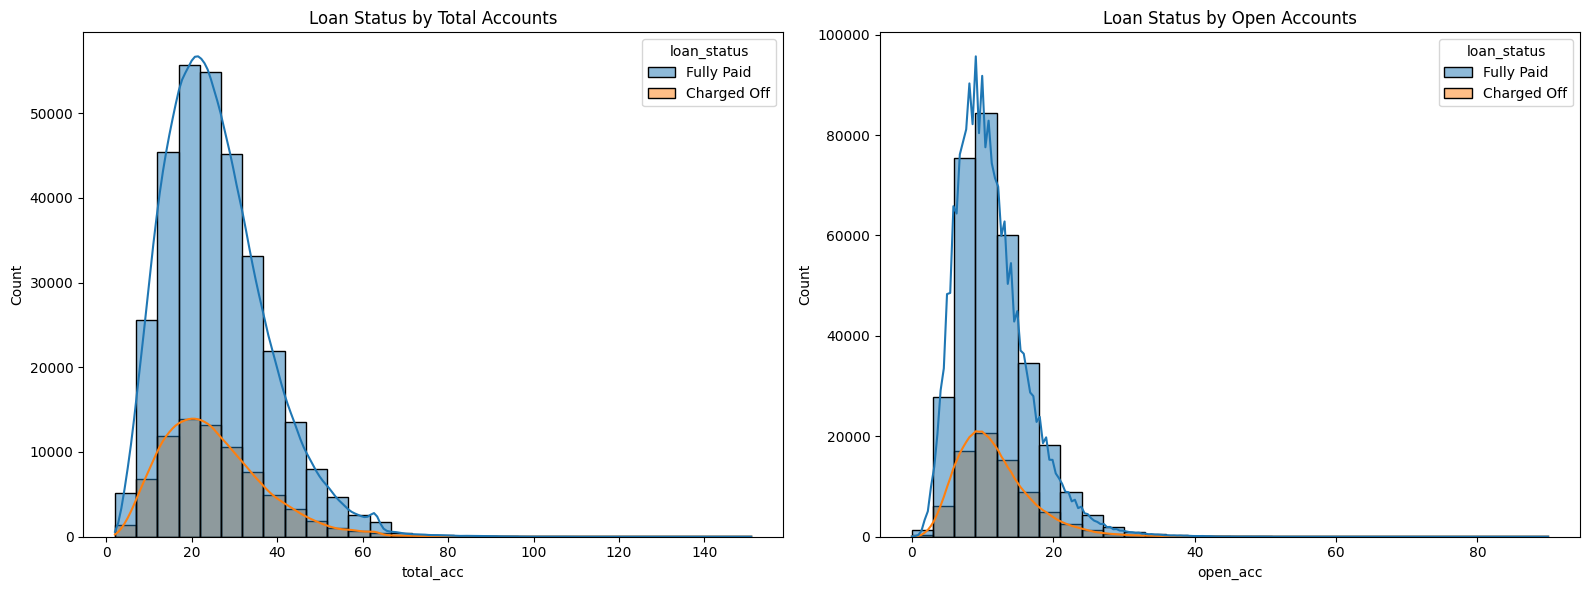

In [85]:
# Plot loan status by total_acc and open_acc
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='total_acc', hue='loan_status', bins=30, kde=True)
plt.title('Loan Status by Total Accounts')
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='open_acc', hue='loan_status', bins=30, kde=True)
plt.title('Loan Status by Open Accounts')
plt.tight_layout()
plt.show()

In [87]:
print(df.shape)
print(df[df.total_acc > 80].shape)
print(df[df.open_acc > 40].shape)

(396030, 26)
(266, 26)
(217, 26)


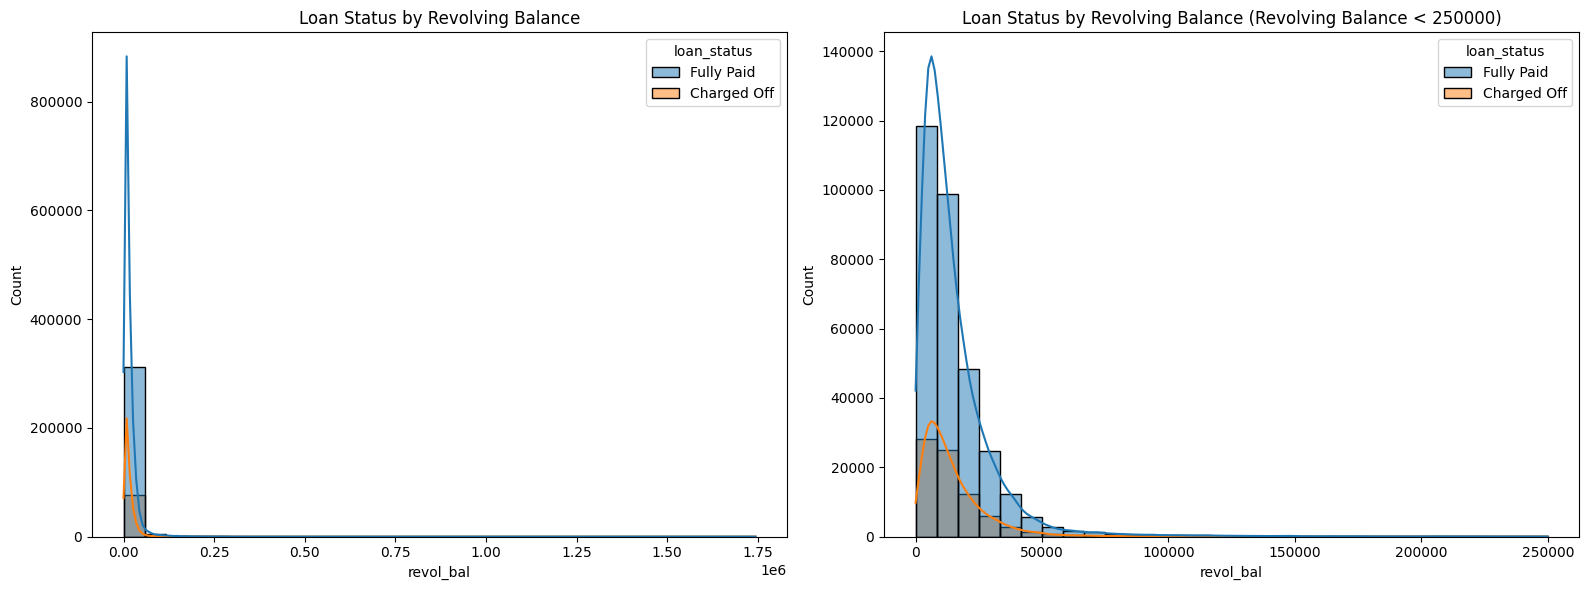

In [86]:
# Plot loan status by revol_bal
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='revol_bal', hue='loan_status', bins=30, kde=True)
plt.title('Loan Status by Revolving Balance')
plt.subplot(1, 2, 2)
sns.histplot(data=df.loc[df['revol_bal'] < 250000], x='revol_bal', hue='loan_status', bins=30, kde=True)
plt.title('Loan Status by Revolving Balance (Revolving Balance < 250000)')
plt.tight_layout()
plt.show()


- It seems that the smaller the dti the more likely that the loan will not be paid.
- Only 217 borrower have more than 40 open credit lines.
- Only 266 borrower have more than 80 credit line in the borrower credit file.

> **✔️ `pub_rec`, `initial_list_status`, `application_type`, `mort_acc`, & `pub_rec_bankruptcies`**

- pub_rec: Number of derogatory public records
- initial_list_status: The initial listing status of the loan. Possible values are – W, F
- application_type: Indicates whether the loan is an individual application or a joint application with two co-borrowers
- mort_acc: Number of mortgage accounts
- pub_rec_bankruptcies: Number of public record bankruptcies

In [94]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1
    
def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
    
def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
    
df['pub_rec'] = df['pub_rec'].apply(pub_rec)
df['mort_acc'] = df['mort_acc'].apply(mort_acc)
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].apply(pub_rec_bankruptcies)

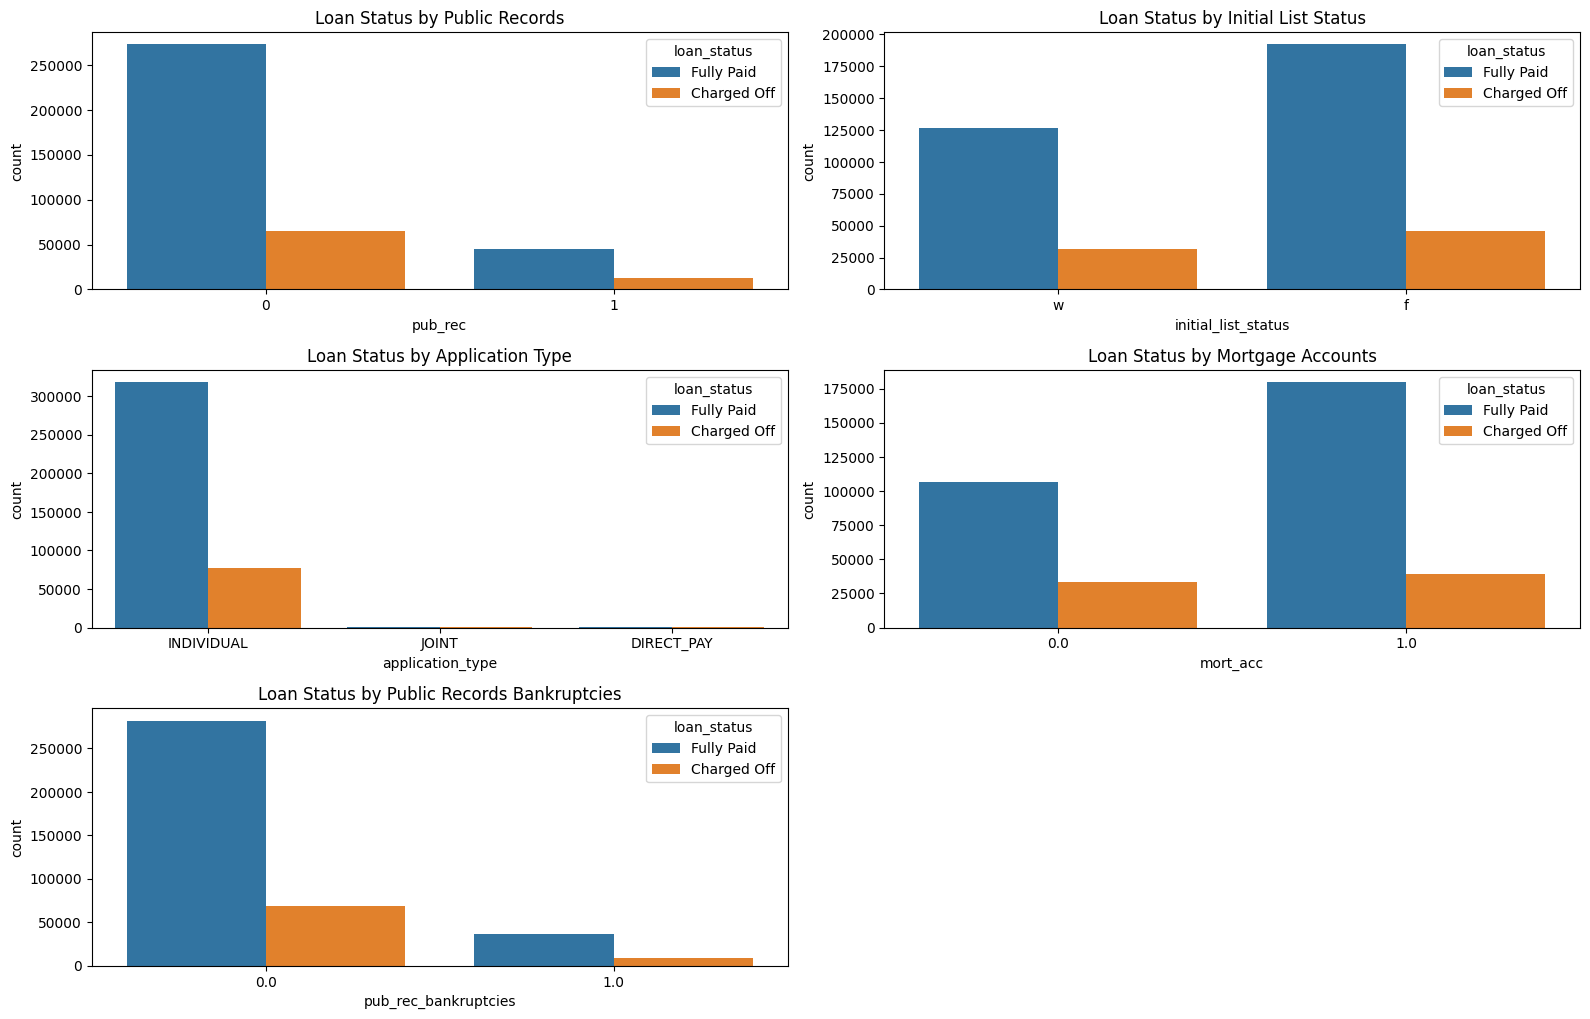

In [95]:
plt.figure(figsize=(16, 20))
plt.subplot(6, 2, 1)
sns.countplot(data=df, x='pub_rec', hue='loan_status')
plt.title('Loan Status by Public Records')
plt.subplot(6, 2, 2)
sns.countplot(data=df, x='initial_list_status', hue='loan_status')
plt.title('Loan Status by Initial List Status')
plt.subplot(6, 2, 3)
sns.countplot(data=df, x='application_type', hue='loan_status')
plt.title('Loan Status by Application Type')
plt.subplot(6, 2, 4)
sns.countplot(data=df, x='mort_acc', hue='loan_status')
plt.title('Loan Status by Mortgage Accounts')
plt.subplot(6, 2, 5)
sns.countplot(data=df, x='pub_rec_bankruptcies', hue='loan_status')
plt.title('Loan Status by Public Records Bankruptcies')

plt.tight_layout()
plt.show()


**3. EDA Conclusion:**
We notice that, there are broadly three types of features:
- Features related to the applicant (demographic variables such as occupation, employment details etc.),
- Features related to loan characteristics (amount of loan, interest rate, purpose of loan etc.)

In [96]:
# Write df to csv
df.to_csv('../dataset/lending_club_loan_EDA.csv', index=False)

In [ ]:
df.loan_status.value_counts(normalize=True)